In [1]:
import pandas as pd # pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# from sklearn import impute
from  scipy.stats import skew, kurtosis, shapiro


plt.rc('axes', linewidth=2)
plt.rc('axes', labelsize= 16)
plt.rc('axes',titlesize = 18)
plt.rc('legend',fontsize=14)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('figure',figsize=(10,8))

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Import the data
* The data contains Na values in every row of the csv file

In [3]:
consumptionLoad = pd.read_csv("D:\Onedrive\Leuven\Final project\data\consumption.csv",index_col = "meter_id")
new_index = np.arange(1,len(consumptionLoad.index)+1)
new_index = []
for i in np.arange(1,len(consumptionLoad.index)+1):
    new_index.append("meter_" + str(i))
new_index = pd.Series(new_index)
consumptionLoad.set_index(new_index,inplace=True)
consumptionLoad_T = consumptionLoad.transpose()
dates = pd.to_datetime(consumptionLoad_T.index)
consumptionLoad_T = consumptionLoad_T.set_index(dates)
consumptionLoad = consumptionLoad_T
consumptionLoad_T.head()


,meter_1,meter_2,meter_3,meter_4,meter_5,meter_6,meter_7,meter_8,meter_9,meter_10,...,meter_3239,meter_3240,meter_3241,meter_3242,meter_3243,meter_3244,meter_3245,meter_3246,meter_3247,meter_3248
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.219,0.015,0.320,0.012,0.155,0.011,0.015,0.222,0.195,0.023
2017-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.707,2.879,0.325,1.476,0.153,1.089,1.523,0.276,2.881,2.307
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.752,2.895,0.194,0.237,0.161,0.014,0.105,0.097,1.765,1.403
2017-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.369,2.038,0.284,0.274,0.206,0.204,0.296,0.058,1.391,1.471
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.583,1.635,0.278,0.015,0.168,0.015,0.067,0.045,1.609,1.421


In [8]:
def visualization_NaN(months_show,meter_show,rows = 4, columns = 3):
    if rows*columns != len(months_show):
        raise Exception("The number of months doesn't match with the amount of provided figures")
    originalMeter = pd.DataFrame(data=consumptionLoad_T[meter_show])
    originalMeter["month"] = originalMeter.index.month_name()
    originalMeter["day"] = originalMeter.index.day
    r=0
    c=0
    _, axes = plt.subplots(rows,columns)

    for m in months_show:
        originalMeter_month = originalMeter[originalMeter["month"] == m]

        index = []
        lost = []
        full = []

        for i in np.arange(originalMeter_month["day"][0],originalMeter_month["day"][-1]+1,1):
            dataDay = originalMeter_month[originalMeter_month["day"] == i]
            index.append(str(i))
            nNaN = dataDay[meter_show].isnull().sum()
            lost.append(nNaN)
            full.append(len(dataDay)-nNaN)

        df = pd.DataFrame(index=index)
        df["full"] = full
        df["lost"] = lost

        df.plot.bar(stacked=True,figsize=(30,24),ax=axes[r][c],title= m)

        if c == columns - 1:
            r += 1
            c = 0
        else:
            c += 1
    
    plt.show()

    full  lost
1     48     0
2     48     0
3     48     0
4     48     0
5     48     0
6     48     0
7     48     0
8     48     0
9     48     0
10     0    48
11    48     0
12    48     0
13    48     0
14    48     0
15    48     0
16    48     0
17    48     0
18    48     0
19    48     0
20    48     0
21    48     0
22    48     0
23    48     0
24    48     0
25    48     0
26    48     0
27    48     0
28    48     0
29    48     0
30    48     0
31    48     0
    full  lost
1     48     0
2     48     0
3     48     0
4     48     0
5     48     0
6     48     0
7     48     0
8     48     0
9     48     0
10    48     0
11    48     0
12    48     0
13    48     0
14    48     0
15    48     0
16    48     0
17    48     0
18    48     0
19    48     0
20    48     0
21    48     0
22    48     0
23    48     0
24    48     0
25    48     0
26    48     0
27    48     0
28    48     0
    full  lost
1     48     0
2     48     0
3     48     0
4     48     0
5     48  

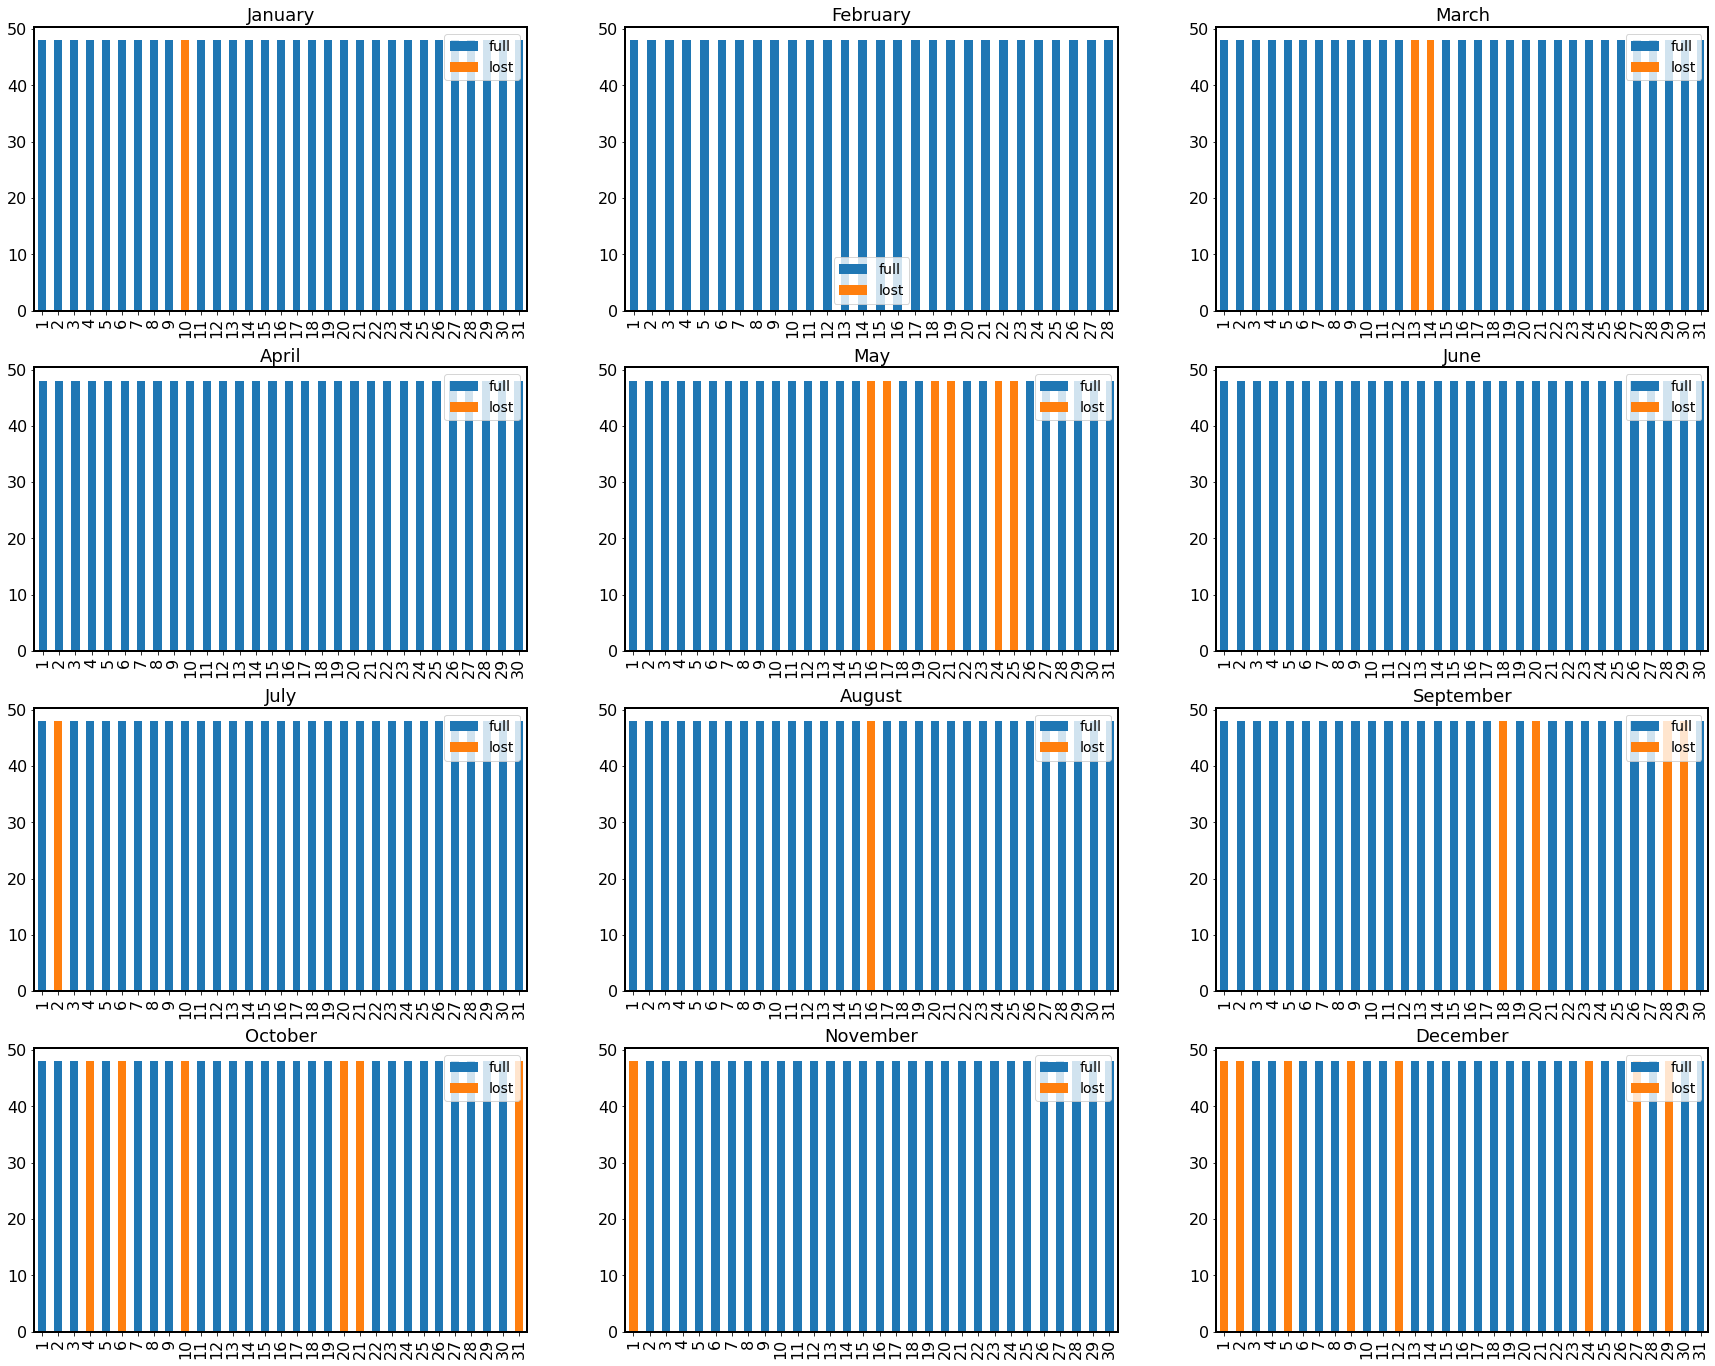

In [9]:
visualization_NaN(["January","February","March","April","May","June","July","August","September","October","November","December"],"meter_3242")

In [6]:
def figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16):
    plt.figure(figsize=figsize)
    ax1 = plt.gca()
    plt.rc('legend',fontsize=fontsize_legend)
    plt.title(titel, fontsize=fontsize_titel, fontweight = 'bold')
    plt.grid(True)
    plt.xlabel(xlabel, fontsize=fontsize_axis)
    plt.ylabel(ylabel, fontsize=fontsize_axis)
    for tick in ax1.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize_ticks)
    #         tick.label1.set_fontweight('bold')
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize_ticks)
    #     tick.label1.set_fontweight('bold')
    
    return ax1

* The 270 timeseries with the least amount of NaN are selected. 

In [7]:
numberNan = consumptionLoad_T.isnull().sum()
numberNan_sorted = numberNan.sort_values(ascending = True)
# most_rich_data = numberNan_sorted.iloc[0:300]
most_rich_data = numberNan[numberNan<2500]
print(most_rich_data)
CL = consumptionLoad_T[most_rich_data.index]
# CL.plot(legend = False);plt.show()

meter_2966    2049
meter_2979    1344
meter_2980    1584
meter_2981    1344
meter_2982    1392
              ... 
meter_3244    1392
meter_3245    2400
meter_3246    1344
meter_3247    1296
meter_3248    1392
Length: 269, dtype: int64


3248

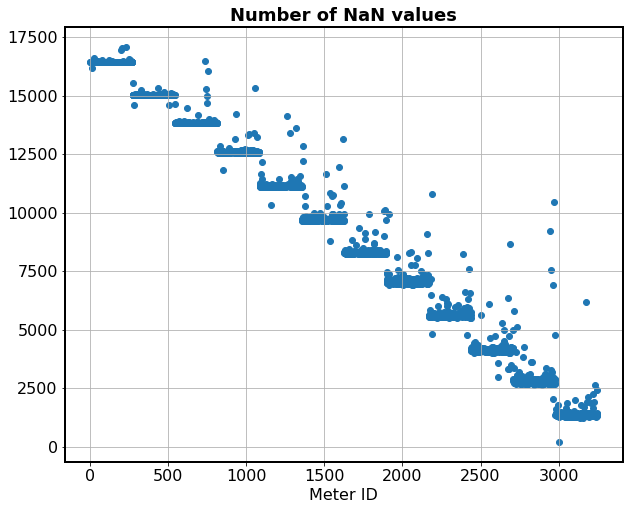

In [19]:
axes = figure_layout((10,8),"Number of NaN values","Meter ID","",18,16,14,16)
axes.scatter(np.arange(1,consumptionLoad_T.shape[1]+1), numberNan)
# axes.legend(["Full dataset"])
plt.show()

In [9]:
januari_check = CL.loc["2017-01-01 00:00:00":"2017-01-31 23:30:00"]
amountNaN_jan = januari_check.isnull().sum()
amountNaN_jan[amountNaN_jan > 100] # meters removed

meter_2966    1488
meter_3159    1248
meter_3178     192
meter_3209     192
meter_3222     240
dtype: int64

Remove the time series with to many NaN in Januari.

In [10]:
fullYeardata = consumptionLoad_T[amountNaN_jan[amountNaN_jan < 100].index]
fullYeardata.info()
# fullYeardata.plot(legend = False);plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
Columns: 264 entries, meter_2979 to meter_3248
dtypes: float64(264)
memory usage: 36.0 MB


In [11]:
# pd.Series(pd.period_range('1/1/2017', freq='W', periods=3))
# fullYeardata_D = fullYeardata.resample('D').agg(['mean'])
fullYeardata.info()
amount_meters = fullYeardata.shape[1]
amount_measurements = fullYeardata.shape[0]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
Columns: 264 entries, meter_2979 to meter_3248
dtypes: float64(264)
memory usage: 36.0 MB


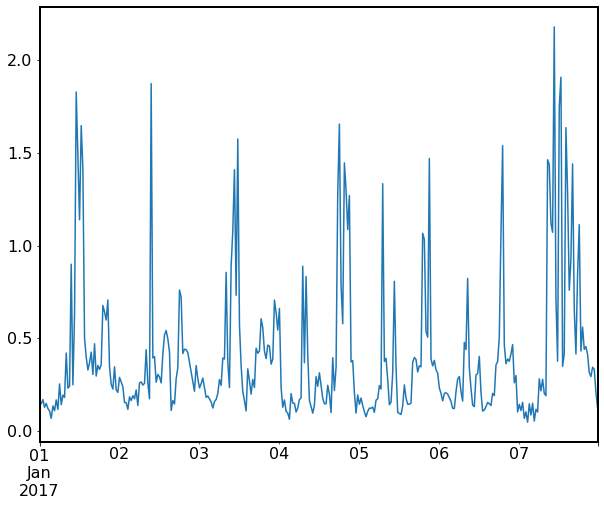

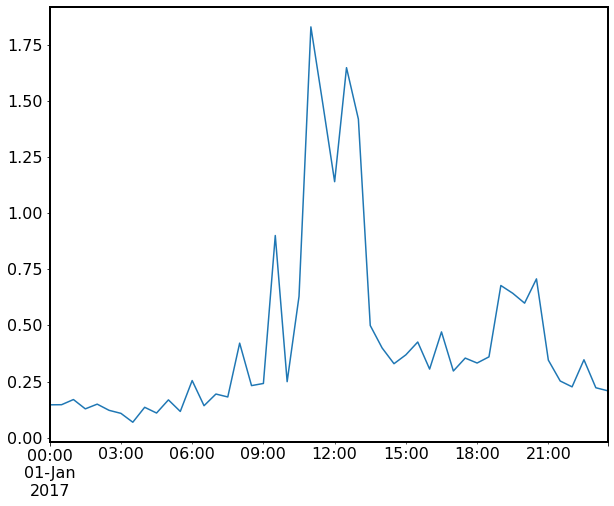

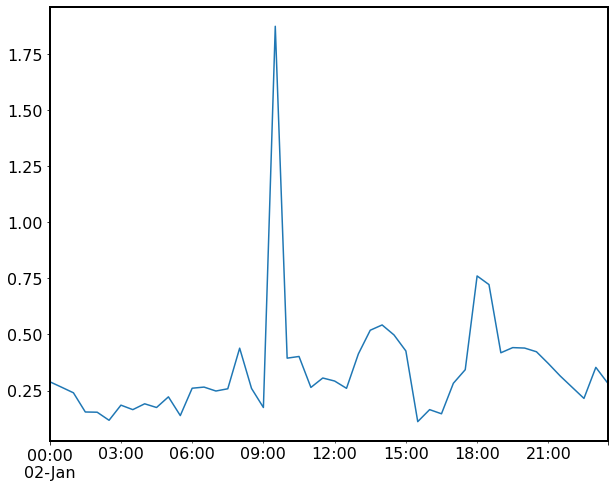

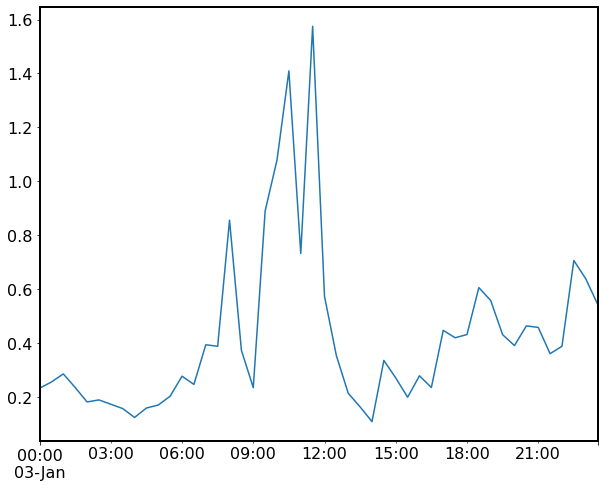

In [12]:
plt.figure();fullYeardata["meter_3002"].loc["2017-01-01 00:00:00":"2017-01-07 23:30:00"].plot()
plt.figure();fullYeardata["meter_3002"].loc["2017-01-01 00:00:00":"2017-01-01 23:30:00"].plot()
plt.figure();fullYeardata["meter_3002"].loc["2017-01-02 00:00:00":"2017-01-02 23:30:00"].plot()
plt.figure();fullYeardata["meter_3002"].loc["2017-01-03 00:00:00":"2017-01-03 23:30:00"].plot()
plt.show()

### Date numbers
* Easy retrieval of certain dates are possible

In [13]:
# fullYeardata_dates = fullYeardata.copy(deep=True)
# fullYeardata_dates["year"] = fullYeardata.index.year
# fullYeardata_dates["qtr"] = fullYeardata.index.quarter
# fullYeardata_dates["mon"] = fullYeardata.index.month
# fullYeardata_dates["week"] = fullYeardata.index.week
# fullYeardata_dates["weekday"] = fullYeardata.index.weekday
# fullYeardata_dates["day"] = fullYeardata.index.day
# fullYeardata_dates.head()

## Retrieving missing values
* All the time series have missing values --> https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7858189

In [14]:
pct_NaN = fullYeardata.isnull().sum().sort_values().div(amount_measurements).mul(100)
print("The amount of missing data per smart meter ranges between {}% and {}%.".format(pct_NaN.min(),pct_NaN.max()))

The amount of missing data per smart meter ranges between 1.095890410958904% and 13.698630136986301%.


In [15]:

my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(fullYeardata) # calculating the mean of each column and switch it with the missing values of the column
FYD_est_mean = pd.DataFrame(data = data_with_imputed_values,index=fullYeardata.index,columns=fullYeardata.keys())
pct_NaN = FYD_est_mean.isnull().sum().sort_values().div(amount_measurements).mul(100)
print("The amount of missing data per smart meter ranges between {}% and {}%.".format(pct_NaN.min(),pct_NaN.max()))

fullYeardata = FYD_est_mean

The amount of missing data per smart meter ranges between 0.0% and 0.0%.


## What is the difference between weekdays and weekends?
* A bit cumbersome way to split the timeseries in seperate weeks. Is there a better way? 

In [16]:
fullYeardata[fullYeardata.index.week == 1]

,meter_2979,meter_2980,meter_2981,meter_2982,meter_2983,meter_2984,meter_2985,meter_2986,meter_2987,meter_2988,...,meter_3239,meter_3240,meter_3241,meter_3242,meter_3243,meter_3244,meter_3245,meter_3246,meter_3247,meter_3248
2017-01-02 00:00:00,0.134,0.279,0.628,0.056,0.151,0.101,0.0,0.178,0.035,0.282,...,0.206,0.013,0.286,0.012,0.173,0.010,0.021,0.127,0.183,0.030
2017-01-02 00:30:00,0.135,1.820,1.798,0.068,0.160,1.318,0.0,0.149,0.044,0.462,...,2.723,2.871,0.146,1.479,0.199,1.066,1.515,0.161,2.967,2.138
2017-01-02 01:00:00,0.120,0.559,1.478,0.050,0.225,0.797,0.0,0.164,0.029,0.444,...,2.727,2.884,0.168,0.216,0.200,0.133,0.168,0.129,2.183,1.530
2017-01-02 01:30:00,0.145,0.488,0.476,0.345,0.192,0.531,0.0,0.037,0.007,0.417,...,1.509,1.868,0.188,0.275,0.197,0.074,0.300,0.094,1.437,1.361
2017-01-02 02:00:00,0.119,0.296,0.409,1.605,0.559,1.979,0.0,0.037,0.021,0.424,...,1.353,1.500,0.160,0.015,0.196,0.069,0.015,0.071,1.728,1.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-08 21:30:00,0.161,0.277,0.183,0.068,0.068,1.420,0.0,0.199,0.371,0.181,...,0.496,0.117,0.784,0.011,0.199,0.011,0.013,0.158,0.234,0.036
2017-01-08 22:00:00,0.155,0.293,0.698,0.070,0.057,0.221,0.0,0.192,0.250,0.157,...,0.615,0.381,0.798,0.012,0.199,0.011,0.017,0.112,0.198,0.046
2017-01-08 22:30:00,0.238,0.277,0.385,0.043,0.032,0.085,0.0,0.194,0.202,0.142,...,0.290,0.062,0.766,0.012,0.201,0.012,0.009,0.163,0.239,0.024
2017-01-08 23:00:00,0.402,0.286,0.076,0.058,0.013,0.837,0.0,0.169,0.075,0.182,...,0.212,0.014,0.740,0.012,0.200,0.011,0.024,0.403,0.184,0.026


In [17]:
fullYeardata.keys()

Index(['meter_2979', 'meter_2980', 'meter_2981', 'meter_2982', 'meter_2983',
       'meter_2984', 'meter_2985', 'meter_2986', 'meter_2987', 'meter_2988',
       ...
       'meter_3239', 'meter_3240', 'meter_3241', 'meter_3242', 'meter_3243',
       'meter_3244', 'meter_3245', 'meter_3246', 'meter_3247', 'meter_3248'],
      dtype='object', length=264)

In [18]:
start_dates = pd.date_range('1/1/2017 00:00:00', freq='W-SUN', periods=52)

In [19]:
end_dates = pd.date_range('1/7/2017 23:30:00', freq='W-SAT', periods=52)

In [20]:
weeklyData = fullYeardata.loc[start_dates[0]:end_dates[0]]
weeklyData = weeklyData.reset_index(drop=True)
weeklyData = weeklyData.fillna(0) # NaN values are replaced by zero which is an approximation
for i in np.arange(1,len(start_dates),1):
    temp_weeklyData = fullYeardata.loc[start_dates[i]:end_dates[i]]
    temp_weeklyData = temp_weeklyData.reset_index(drop=True) 
    temp_weeklyData = temp_weeklyData.fillna(0)
    weeklyData = weeklyData.add(temp_weeklyData)
weeklyData # weekly data is made by taking all the weeks of the year, adding them and then dividing them (Still has to be done!) by the total amount of weeks per meter.


,meter_2979,meter_2980,meter_2981,meter_2982,meter_2983,meter_2984,meter_2985,meter_2986,meter_2987,meter_2988,...,meter_3239,meter_3240,meter_3241,meter_3242,meter_3243,meter_3244,meter_3245,meter_3246,meter_3247,meter_3248
0,8.62656,6.848741,8.0097,3.992427,2.395805,23.539545,2.093244,4.744598,3.685779,16.994214,...,7.600133,2.624161,17.079267,5.457814,9.175497,2.725972,1.520786,4.855781,4.36936,6.495531
1,8.23556,82.204741,76.8337,3.538427,2.470805,29.560545,2.600244,4.009598,3.443779,18.297214,...,126.652133,89.194161,15.519267,93.914814,8.709497,61.303972,61.584786,4.037781,114.50236,101.819531
2,8.66556,42.539741,61.8257,2.996427,2.465805,26.097545,1.503244,3.535598,3.441779,18.496214,...,118.389133,83.590161,14.347267,86.004814,8.499497,14.885972,12.841786,3.707781,52.97136,59.813531
3,7.85156,24.679741,40.6957,4.606427,2.449805,51.623545,1.302244,3.343598,3.364779,17.793214,...,68.684133,45.723161,14.491267,84.952814,8.448497,8.344972,11.365786,3.401781,40.34236,42.299531
4,7.87156,16.336741,25.8957,26.947427,7.187805,43.205545,1.876244,3.326598,3.473779,17.667214,...,49.980133,22.404161,15.148267,78.494814,8.361497,8.155972,8.417786,4.406781,43.10936,34.385531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,17.85956,7.470593,12.5267,9.591066,3.563740,28.431241,0.864111,7.181797,10.160559,14.262357,...,12.155844,4.975215,21.231901,11.854752,15.950828,2.755296,1.533786,7.223561,12.55954,7.900709
332,14.21756,6.613593,12.1267,8.701066,3.009740,29.672241,0.855111,6.314797,8.496559,13.991357,...,13.543844,6.849215,20.894901,9.946752,14.279828,2.697296,1.468786,6.654561,10.27954,7.187709
333,14.07456,6.344593,10.9777,6.492066,2.909740,26.072241,0.867111,5.756797,6.529559,14.667357,...,9.928844,4.779215,21.214901,9.460752,12.716828,2.692296,1.492786,6.869561,7.22454,6.695709
334,13.46656,6.332593,10.1837,4.875066,2.777740,28.841241,1.057111,5.494797,5.081559,15.518357,...,7.798844,3.473215,19.660901,7.796752,12.449828,2.770296,1.473786,5.759561,4.47354,6.651709


In [21]:
meanLoad = weeklyData.div(len(start_dates)).sum(axis=1).div(amount_meters)
meanLoad = meanLoad.div(meanLoad.max())
print(meanLoad)
monday = meanLoad.iloc[0:48].sum(axis=0)
tuesday = meanLoad.iloc[49:96].sum(axis=0)
wednesday = meanLoad.iloc[97:144].sum(axis=0)
thursday = meanLoad.iloc[145:192].sum(axis=0)
friday = meanLoad.iloc[193:240].sum(axis=0)
saterday = meanLoad.iloc[241:288].sum(axis=0)
sunday = meanLoad.iloc[289:].sum(axis=0)

0      0.407795
1      0.695281
2      0.569966
3      0.524354
4      0.555617
         ...   
331    0.672171
332    0.631295
333    0.561434
334    0.493101
335    0.446399
Length: 336, dtype: float64


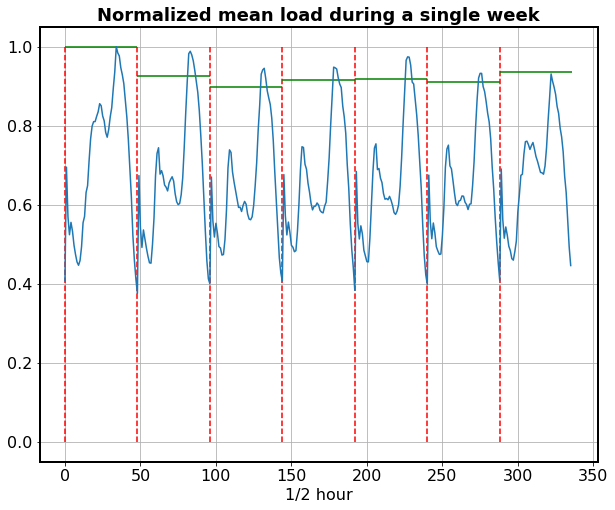

In [22]:
# This plot shows one week of data averaged over all the meters with full data where the NaN's are subsituted by zeros, averaged over all the weeks in a year.
# Then they are normalized by the maximum of the bleu curve and this gives the normalized week consumption.
# The red lines show the start of a new weekday. The greenlines show the total normalized consumption for one day divided by the maximum of the seven sums.

axes1 = figure_layout((10,8),"Normalized mean load during a single week","1/2 hour","",18,16,14,16)
days_hours = [0,48,96,144,192,240,288,336]
for i in [0,48,96,144,192,240,288]:
    plt.vlines(x=i,ymin=0,ymax=1,colors='r',linestyles='dashed')
j=0
maximum = max([monday,tuesday,wednesday,thursday,friday,saterday,sunday])
for i in [monday,tuesday,wednesday,thursday,friday,saterday,sunday]:
    plt.hlines(y=i/maximum,xmin=days_hours[j],xmax=days_hours[j+1],colors='g')
    j += 1
meanLoad.plot(grid=True, ax = axes1)

plt.show()


* I expected a bigger difference between weekdays and weekends
* (make a plot about seasonality)

## EDA: Exploratory Data Analysis

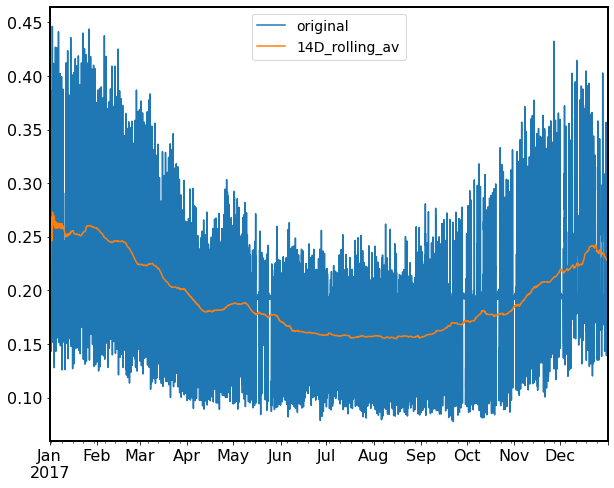

In [23]:
fullYeardata_mean = fullYeardata.sum(axis=1).div(amount_meters)
# print(fullYeardata_mean.isnull())
df_EDA = pd.DataFrame(data= fullYeardata_mean,columns=["original"])
df_EDA["14D_rolling_av"] = fullYeardata_mean.rolling(window='14D').mean() # the outliers in the graph are probably the NaN values put to zero --> need better method
df_EDA.plot()

# fullYeardata_mean.plot()
# plt.show()

This figure gives already an indication that the overall consumption is lower in the summer than in the winter months, which is logical --> heating.

### Target Analyisis: Normality

In [24]:
mean = np.mean(fullYeardata_mean)
print("This is the mean: {}".format(mean))
std = np.std(fullYeardata_mean)
print("This is the standard deviation: {}".format(std)) 
# skew = skew(fullYeardata_mean)
# ex_kurt = kurtosis(fullYeardata_mean)

This is the mean: 0.19301250654005303
This is the standard deviation: 0.06063777779685394
